In [1]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

In [2]:
# read John Hopkins data from Github
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_global = pd.read_csv(base_url + 'time_series_covid19_confirmed_global.csv')
deaths_global = pd.read_csv(base_url + 'time_series_covid19_deaths_global.csv')
confirmed_us = pd.read_csv(base_url + 'time_series_covid19_confirmed_US.csv')
deaths_us = pd.read_csv(base_url + 'time_series_covid19_deaths_US.csv')

# get latest or current date from data set(s)
latest_date = confirmed_us.columns.values[-1]

# aggregate data by state (separate highest and lowest states)
us_drop_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
confirmed_us.drop(us_drop_columns, axis=1, inplace=True)
deaths_us.drop(us_drop_columns + ['Population'], axis=1, inplace=True)
confirmed_us_sorted = confirmed_us.groupby('Province_State').agg('sum').sort_values(by=latest_date, ascending=False)
deaths_us_sorted = deaths_us.groupby('Province_State').agg('sum').sort_values(by=latest_date, ascending=False)
states = confirmed_us_sorted.T.columns.values

us_confirmed = confirmed_us_sorted.T
us_deaths = deaths_us_sorted.T[states]

# aggregate data by country
global_drop_columns = ['Province/State', 'Lat', 'Long']
confirmed_global.drop(global_drop_columns, axis=1, inplace=True)
confirmed_global_sorted = confirmed_global.groupby('Country/Region').agg('sum').sort_values(by=latest_date, ascending=False)
deaths_global.drop(global_drop_columns, axis=1, inplace=True)
deaths_global_sorted = deaths_global.groupby('Country/Region').agg('sum').sort_values(by=latest_date, ascending=False)
countries = confirmed_global_sorted.T.columns.values

global_confirmed = confirmed_global_sorted.T
global_deaths = deaths_global_sorted.T

In [3]:
# output current results
current_confirmed_global = confirmed_global_sorted[[latest_date]]
current_confirmed_global = current_confirmed_global.rename(columns={latest_date: 'confirmed'})
# print(current_confirmed_global.head())

current_deaths_global = deaths_global_sorted[[latest_date]]
current_deaths_global = current_deaths_global.rename(columns={latest_date: 'deaths'})
# print(current_deaths_global.head())

# join confirmed with deaths
joined_global = current_confirmed_global.merge(current_deaths_global, left_index=True, right_index=True)
joined_global['percentDeaths'] = joined_global['deaths'].divide(joined_global['confirmed'], axis=0)

joined_global.head(20)

,confirmed,deaths,percentDeaths
Country/Region,,,
US,699706,36773,0.052555
Spain,190839,20002,0.104811
Italy,172434,22745,0.131906
France,149130,18703,0.125414
Germany,141397,4352,0.030779
United Kingdom,109769,14607,0.133070
China,83760,4636,0.055349
Iran,79494,4958,0.062369
Turkey,78546,1769,0.022522


In [4]:
# output current results
current_confirmed_us = confirmed_us_sorted[[latest_date]]
current_confirmed_us = current_confirmed_us.rename(columns={latest_date: 'confirmed'})
# print(current_confirmed_global.head())

current_deaths_us = deaths_us_sorted[[latest_date]]
current_deaths_us = current_deaths_us.rename(columns={latest_date: 'deaths'})
# print(current_deaths_global.head())

# join confirmed with deaths
joined_us = current_confirmed_us.merge(current_deaths_us, left_index=True, right_index=True)
joined_us['percentDeaths'] = joined_us['deaths'].divide(joined_us['confirmed'], axis=0)

joined_us.head(20)

,confirmed,deaths,percentDeaths
Province_State,,,
New York,230597,17131,0.074290
New Jersey,78467,3840,0.048938
Massachusetts,34402,1245,0.036190
Michigan,30023,2227,0.074176
Pennsylvania,29888,921,0.030815
California,29157,1037,0.035566
Illinois,27578,1132,0.041047
Florida,24759,725,0.029282
Louisiana,23118,1213,0.052470


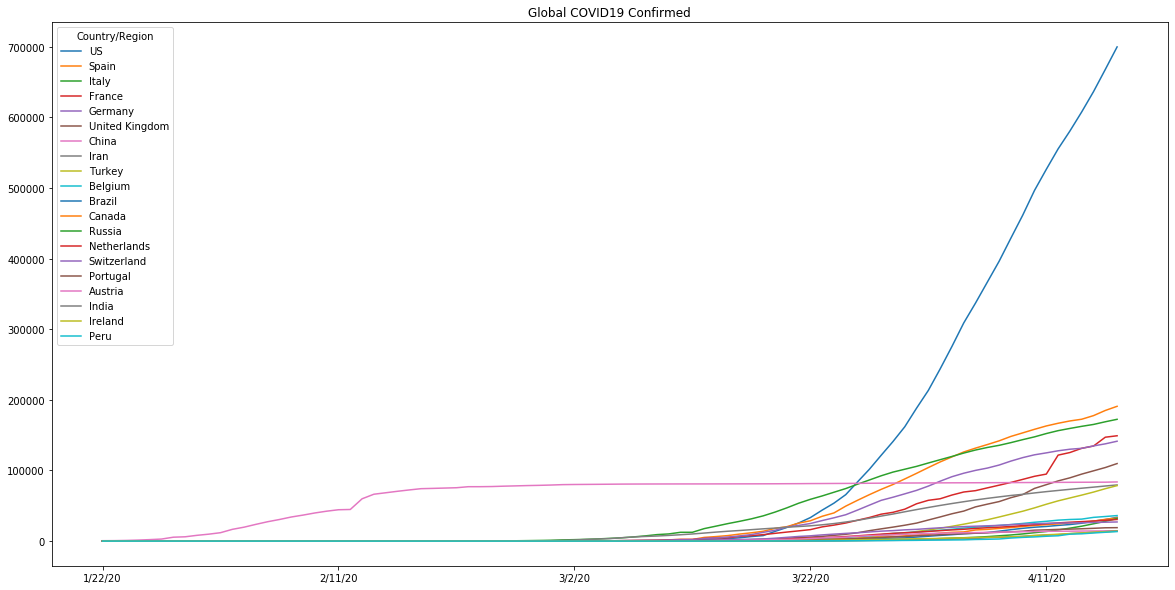

In [5]:
confirmed_global_sorted[:20].T.plot(figsize=(20,10), title="Global COVID19 Confirmed")

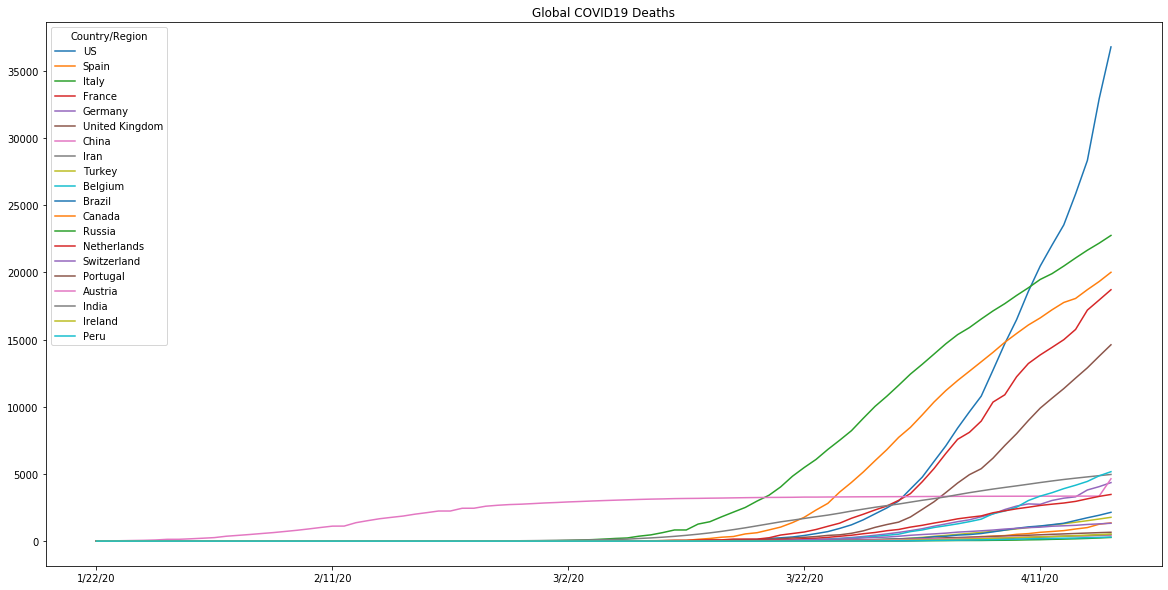

In [6]:
countries = confirmed_global_sorted.T.columns.values
deaths_global_sorted.T[countries[0:20]].plot(figsize=(20,10), title="Global COVID19 Deaths")

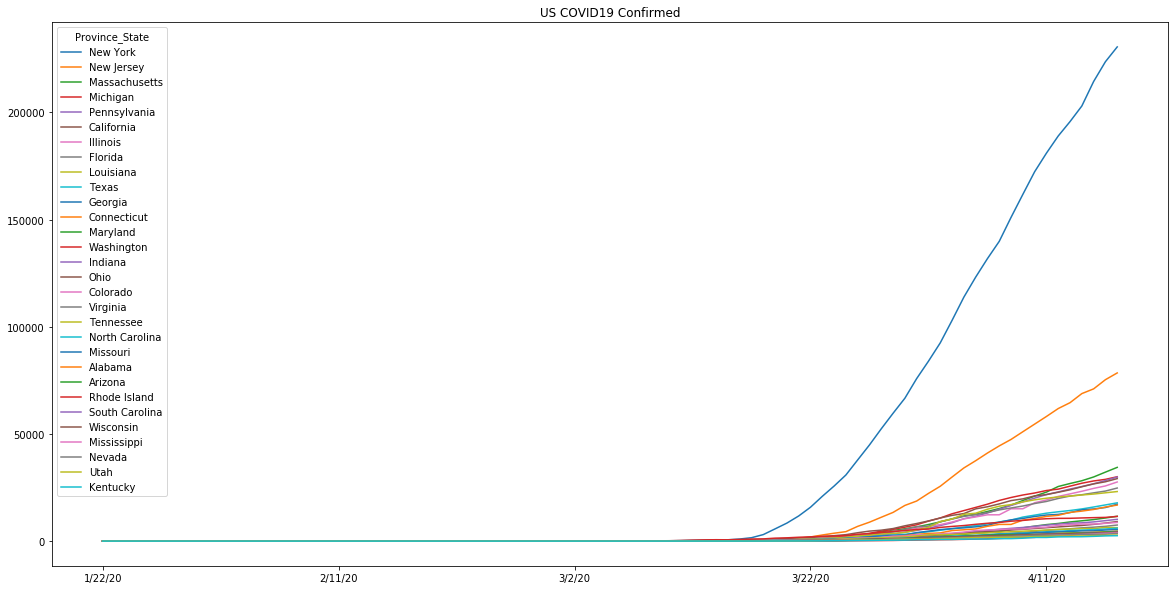

In [7]:
confirmed_us_sorted[:30].T.plot(figsize=(20,10), title="US COVID19 Confirmed")

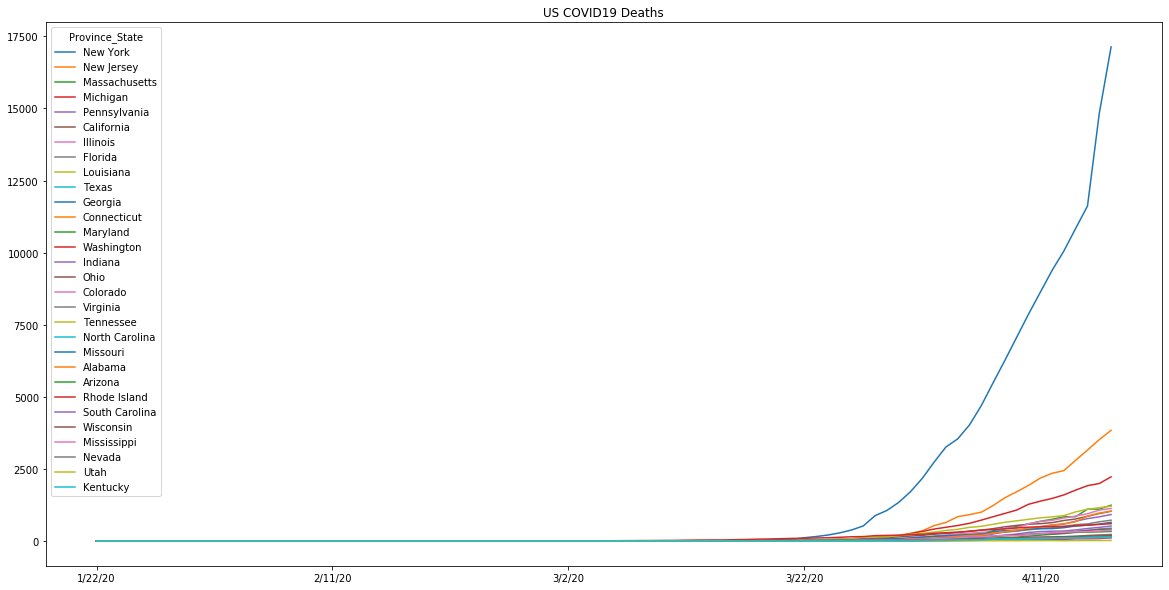

In [8]:
states = confirmed_us_sorted.T.columns.values
deaths_us_sorted.T[states[0:30]].plot(figsize=(20,10), title="US COVID19 Deaths")